### Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

### Load data

In [4]:
df_order = pd.read_csv('data/machine_learning_challenge_order_data.csv')
df_label = pd.read_csv('data/machine_learning_challenge_labeled_data.csv')

In [5]:
df_order.customer_id.value_counts()

15edce943edd    386
8745a335e9cf    288
d956116d863d    286
0063666607bb    273
ae60dce05485    270
               ... 
9bf78a942251      1
7df4357610f4      1
e16265857f37      1
03f57b89876d      1
68eafea839f9      1
Name: customer_id, Length: 245455, dtype: int64

In [6]:
df_label.customer_id.value_counts()

f45a9752131b    1
da176116dd50    1
4e6383bc8329    1
166132d0d69b    1
0cbb4d27b9b9    1
               ..
4f6fb63d6a0b    1
c6e3c8c9489d    1
84d3ec53f42f    1
134f17b3d5fe    1
68eafea839f9    1
Name: customer_id, Length: 245455, dtype: int64

In [7]:
# percentage of labeled customers in all orders
cus_order = set(df_order.customer_id.unique().tolist())
cus_label = set(df_label.customer_id.unique().tolist())
perc_labeled = len(cus_order.intersection(cus_label)) / len(cus_order.union(cus_label)) * 100
perc_labeled

100.0

### Explore

In [8]:
df_order.head()

,customer_id,order_date,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id
0,000097eabfd9,2015-06-20,19,1.0,0,0.0,0.000,11.46960,5803498,20326,1779,30231,4356
1,0000e2c6d9be,2016-01-29,20,1.0,0,0.0,0.000,9.55800,239303498,76547,1619,30359,4356
2,000133bb597f,2017-02-26,19,1.0,0,0.0,0.493,5.93658,206463498,33833,1619,30359,4324
3,00018269939b,2017-02-05,17,1.0,0,0.0,0.493,9.82350,36613498,99315,1619,30359,4356
4,0001a00468a6,2015-08-04,19,1.0,0,0.0,0.493,5.15070,225853498,16456,1619,29463,4356


In [9]:
df_order.dtypes

customer_id             object
order_date              object
order_hour               int64
customer_order_rank    float64
is_failed                int64
voucher_amount         float64
delivery_fee           float64
amount_paid            float64
restaurant_id            int64
city_id                  int64
payment_id               int64
platform_id              int64
transmission_id          int64
dtype: object

In [10]:
for c in df_order.columns:
    if '_id' in c:
        df_order[c] = df_order[c].apply(str)

In [11]:
df_order.describe(include='all')

,customer_id,order_date,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id
count,786600,786600,786600.000000,761833.000000,786600.000000,786600.000000,786600.00000,786600.000000,786600,786600,786600,786600,786600
unique,245455,776,NaN,NaN,NaN,NaN,NaN,NaN,13569,3749,5,14,10
top,15edce943edd,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,37623498,10346,1619,29463,4356
freq,386,4230,NaN,NaN,NaN,NaN,NaN,NaN,1317,86654,476600,241523,341734
mean,NaN,NaN,17.588796,9.436810,0.031486,0.091489,0.18118,10.183271,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,3.357192,17.772322,0.174628,0.479558,0.36971,5.618121,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,16.000000,1.000000,0.000000,0.000000,0.00000,6.648120,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,18.000000,3.000000,0.000000,0.000000,0.00000,9.027000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,20.000000,10.000000,0.000000,0.000000,0.00000,12.213000,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

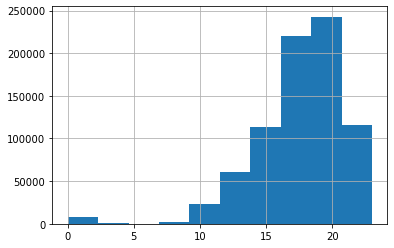

In [12]:
df_order.order_hour.hist()

<AxesSubplot:ylabel='Frequency'>

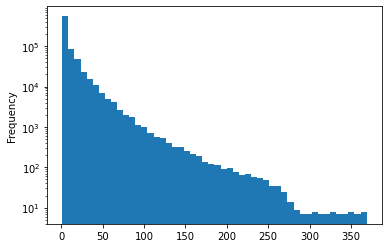

In [13]:
df_order.customer_order_rank.plot(kind='hist', bins=50, logy=True)
# check if frequency is strongly correlated to returning

In [25]:
# sns.pairplot(df_order[['order_hour', 'customer_order_rank', 'is_failed', 'voucher_amount', 
#                        'delivery_fee', 'amount_paid']].sample(frac=0.1, random_state=12), 
#              plot_kws={'alpha':0.1})

<AxesSubplot:title={'center':'Order trend'}, xlabel='order_date'>

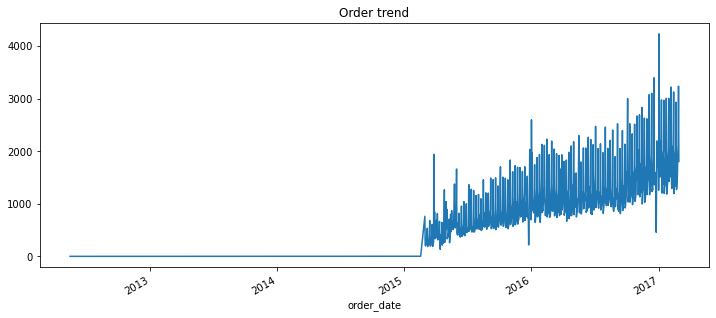

In [36]:
dfs = df_order.groupby('order_date')['customer_id'].count()
dfs.index = pd.to_datetime(dfs.index)
dfs.plot(title='Order trend', figsize=(12,5))

In [37]:
df_order[df_order.order_date >= '2015-02-28'].order_date.min()

'2015-03-01'

It seems like we can safetly remove the outlier introduced at 2012-05-17 and keep the rest of transactions.

In [41]:
df_label.head()

,customer_id,is_returning_customer
0,000097eabfd9,0
1,0000e2c6d9be,0
2,000133bb597f,1
3,00018269939b,0
4,0001a00468a6,0


In [42]:
df_label.is_returning_customer.value_counts()

0    189948
1     55507
Name: is_returning_customer, dtype: int64

### Feature Engineering

In [19]:
df_order.order_date.min(), df_order.order_date.max()

('2012-05-17', '2017-02-27')

#### 1. A Simple Model on Feb 2017

We are going to use features derived in one year (2016-03 to 2017-02) to train and predict if a customer comes back within 6 months.

In [34]:
df_order_sample = df_order[df_order.order_date >= '2015-02-28'].reset_index()
df_order_sample.shape

(786547, 14)

In [22]:
df_order.shape

(786600, 13)

In [ ]:
df_order['year_month'] = df_order.date.apply(lambda x: x[0:7])
df_order['weekmonth'] = df_order.date.apply(lambda x: 
    'W1' if x[8:10] <= '07' 
    else('W2' if x[8:10] <= '14' 
    else ('W3' if x[8:10] <= '21' 
    else 'W4')))

df_order['weekday'] = pd.to_datetime(df_order.date).apply(lambda x: calendar.day_name[x.weekday()])

In [ ]:
### Problem Design and Train-Test Splitting
df_order.order_date.min(), df_order.order_date.max()